<a href="https://colab.research.google.com/github/zdvinkofff/Developer-AI/blob/main/%22Video2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модификация видео средствами OpenCV
Задания этого урока будет проще выполнить на локальном компьютере, поскольку они предполагают работу с веб-камерой. Для работы на локальном компьютере вам потребуются установленные библиотеки numpy и openCV. Для работы с ними можно использовать либо непосредственно интерпретатор, либо виртуальное окружение.

Ниже находится несколько упражнений, представляющих собой код с пропущенными фрагментами, которые надо воспроизвести. Часть из этих упражнений очень простые, над некоторыми надо хорошенько подумать.

Чтобы выполнить это задание, нужно сохранить копию файла себе на компьютер и запустить в Jupyter Notebook.
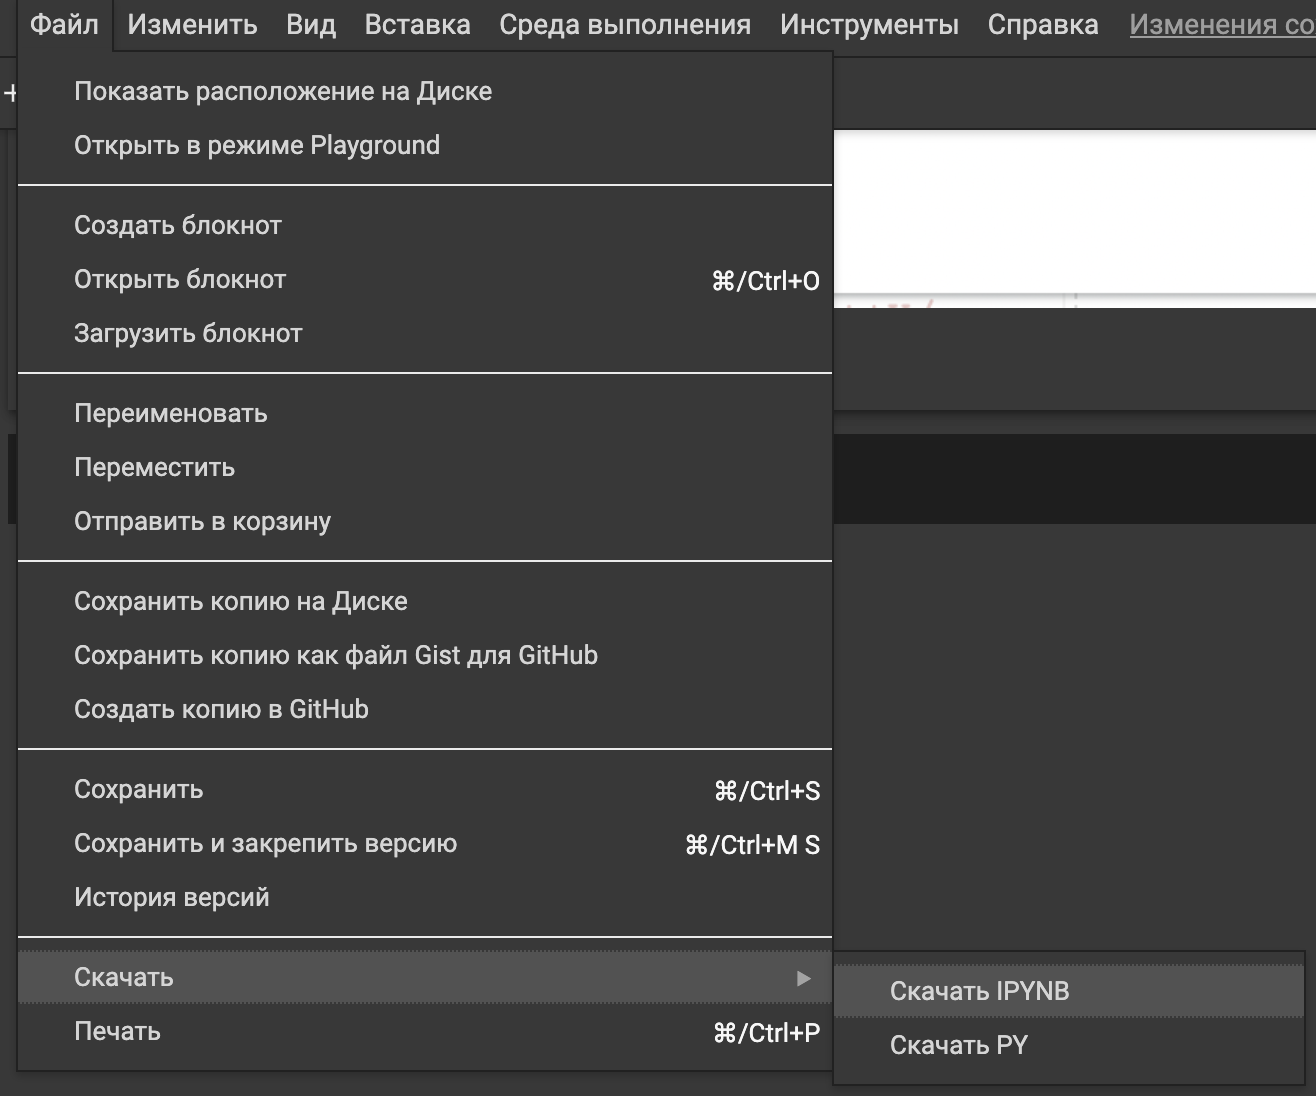

После выполнения задания, его нужно отправить на проверку. Для этого достаточно предоставить доступ к файлу и отправить ссылку в соответствующее поле LMS курса.



### Упражнение 1
Используя класс VideoCapture() выведите изображение с веб-камеры на экран. Пусть изображение будет черно-белым.

In [3]:
import cv2
import numpy as np

# Создаем объект видеозахвата
cap = cv2.VideoCapture(0)

while True:
    # Получаем кадр с веб-камеры
    ret, frame = cap.read()

    # Преобразуем кадр в черно-белое изображение
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Отображаем черно-белое изображение
    cv2.imshow('Frame', gray)

    # Выходим из цикла, если нажата клавиша 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождаем ресурсы
cap.release()
cv2.destroyAllWindows()




Cannot open camera
Cannot receive frame


### Упражнение 2
В прошлом уроке мы учились работать с областью интереса на статичных изображениях. Давайте применим это умение в кадрам видео. Сделайте так, чтобы центральная область кадра была цветной, в то время как остальная часть выводимого видео была черно-белой.

In [ ]:
import cv2
import numpy as np

# Создаем объект видеозахвата
cap = cv2.VideoCapture(0)

while True:
    # Получаем кадр с веб-камеры
    ret, frame = cap.read()

    # Получаем размеры кадра
    height, width, _ = frame.shape

    # Создаем маску для области интереса
    mask = np.zeros_like(frame)
    mask[int(height/4):int(3*height/4), int(width/4):int(3*width/4)] = (255, 255, 255)

    # Применяем маску к кадру
    result = cv2.bitwise_and(frame, mask)

    # Отображаем результат
    cv2.imshow('Frame', result)

    # Выходим из цикла, если нажата клавиша 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождаем ресурсы
cap.release()
cv2.destroyAllWindows()



### Упражнение 3
Теперь сделаем область интереса подвижной. Напишите алгоритм, реализующий перемещение (характер движения пусть будет на ваш выбор)области интереса  по передаваемому по веб-камере видео, так чтобы в области интереса пиксели были цветные, а остальное было черно-белым.

In [ ]:
import cv2
import numpy as np

# Создаем объект видеозахвата
cap = cv2.VideoCapture(0)

# Начальные координаты области интереса
x, y, w, h = 100, 100, 200, 200

# Скорость движения
dx, dy = 2, 2

while True:
    # Получаем кадр с веб-камеры
    ret, frame = cap.read()

    # Создаем маску для области интереса
    mask = np.zeros_like(frame)
    mask[y:y+h, x:x+w] = (255, 255, 255)

    # Применяем маску к кадру
    result = cv2.bitwise_and(frame, mask)

    # Обновляем координаты области интереса
    x += dx
    y += dy

    # Проверяем, если область вышла за границы кадра, меняем направление движения
    if x <= 0 or x + w >= frame.shape[1]:
        dx *= -1
    if y <= 0 or y + h >= frame.shape[0]:
        dy *= -1

    # Отображаем результат
    cv2.imshow('Frame', result)

    # Выходим из цикла, если нажата клавиша 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождаем ресурсы
cap.release()
cv2.destroyAllWindows()


### Упражнение 4
Теперь научимся интерактивно управлять объектом на изображении. Создайте цветной прямоугольник с любыми начальными координатами. А затем напишите содержимое функций, чтобы изменяя ползунки трекбаров ( [trackbar](https://www.rupython.com/cv2-createtrackbar-python-23130.html)), изменялись координаты прямоугольника.

In [ ]:
import cv2
import numpy as np

# Функции для изменения координат прямоугольника
def moveX(val):
    global x
    x = val

def moveY(val):
    global y
    y = val

# Начальные координаты прямоугольника
x, y = 100, 100
width, height = 200, 200

# Создаем окно с трекбарами
cv2.namedWindow('Moving the rectangle')
cv2.resizeWindow('Moving the rectangle', 400, 300)
cv2.createTrackbar('X', 'Moving the rectangle', x, 1000, moveX)
cv2.createTrackbar('Y', 'Moving the rectangle', y, 1000, moveY)

while True:
    # Создаем изображение с прямоугольником
    frame = np.zeros((480, 640, 3), np.uint8)
    cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)

    # Отображаем изображение с прямоугольником
    cv2.imshow('Moving the rectangle', frame)

    # Выходим из цикла, если нажата клавиша 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

